8
b'Molecular Dynamics Project\n8\n10\nIncrease the relaxation Time 1.58448e-15\n'
b''
16
b'Molecular Dynamics Project\n16\n10\n'
b''
24
b'Molecular Dynamics Project\n24\n10\n'
b''
32
b'Molecular Dynamics Project\n32\n10\n'
b''
40
b'Molecular Dynamics Project\n40\n10\n'
b''
48
b'Molecular Dynamics Project\n48\n10\n'
b''
56
b'Molecular Dynamics Project\n56\n10\n'
b''
64
b'Molecular Dynamics Project\n64\n10\n'
b''
72
b'Molecular Dynamics Project\n72\n10\n'
b''
80
b'Molecular Dynamics Project\n80\n10\n'
b''
88
b'Molecular Dynamics Project\n88\n10\n'
b''
96
b'Molecular Dynamics Project\n96\n10\n'
b''
104
b'Molecular Dynamics Project\n104\n10\n'
b''
112
b'Molecular Dynamics Project\n112\n10\n'
b''
120
b'Molecular Dynamics Project\n120\n10\n'
b''
128
b'Molecular Dynamics Project\n128\n10\n'
b'Cube Exploded at: 9900\n'
136
b'Molecular Dynamics Project\n136\n10\nIncrease the relaxation Time 1.58448e-15\n'
b''
144
b'Molecular Dynamics Project\n144\n10\n'
b''
152
b'Molecular Dynamics Project\n15

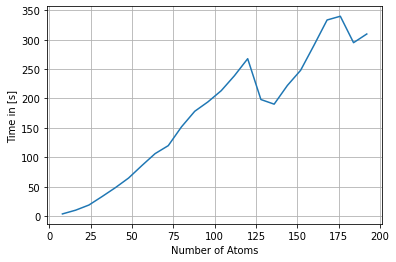

In [16]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from subprocess import Popen,PIPE
import time

#folder bs
programbasePath = "/home/cm/CLionProjects/MoleDymCode/cmake-build-debug/"
programName = "myproject"
programCall = programbasePath + programName

#main variables
atomcount = (np.arange(24) +1)*8
times = []
relaxationTime = 10.0 #low so it does not explode and we do not care anyways
#
def functionCaller(nbAtoms):
    '''this function should help with the computational complexy of the function
    and just calls it with different numbers of atoms and then safes a graph
    '''
    #
    start = time.time()
    print(nbAtoms)
    #calls time to call is just overhead that ocurrs always
    #was run with time and in python (33.169 vs 33.246 for 48 atoms) for me the offset is aceptable
    process = Popen([programCall,str(nbAtoms),str(relaxationTime)],stdout = PIPE, stderr= PIPE)
    Popen.wait(process)
    end = time.time()
    stdout, stderr = process.communicate()
    print(stdout)
    print(stderr)
    #print(end-start)
    return end -start

#run a bunch of times
for i in atomcount:
    times.append(functionCaller(i))

#plot
print(times)
print(atomcount)
plt.plot(atomcount,times)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

In [ ]:
#data safe till 144 atoms
magicList = [1.2753801345825195, 4.20757794380188, 9.18721866607666, 16.336894989013672, 24.168758630752563, 33.506770610809326, 46.08373188972473, 59.46736812591553, 74.72118306159973, 94.47463345527649, 111.21811723709106, 131.6394121646881, 152.66178345680237, 179.6160707473755, 203.14466953277588, 232.22742199897766, 261.6146478652954, 287.0486648082733]
magicArray = (np.arange(18) +1)*8
plt.plot(magicArray ,magicList)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

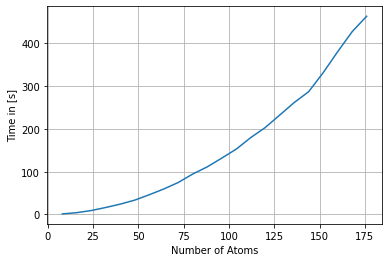

In [51]:
#data safe till 176 run on two different occacions
datalist = [1.2753801345825195, 4.20757794380188, 9.18721866607666, 16.336894989013672, 24.168758630752563, 33.506770610809326, 46.08373188972473, 59.46736812591553, 74.72118306159973, 94.47463345527649, 111.21811723709106, 131.6394121646881, 152.66178345680237, 179.6160707473755, 203.14466953277588, 232.22742199897766, 261.6146478652954, 287.0486648082733, 331.37267446517944, 380.43633675575256, 427.25043082237244, 463.3071937561035]
dataarray = (np.arange(18+4) +1)*8
plt.plot(,times)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

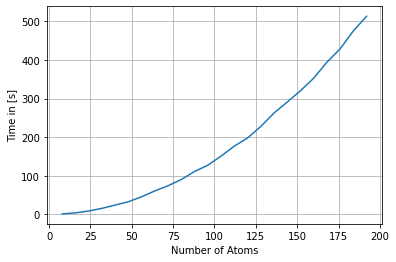

In [56]:
#run till 192 as you can see the orignal crashed while plotting oversight by me btw
datalist = [1.198791265487671, 3.967493772506714, 8.7883882522583, 15.605122566223145, 24.176962852478027, 32.87297296524048, 45.74373507499695, 60.98107290267944, 74.32088994979858, 90.4915418624878, 111.26894021034241, 127.44833827018738, 151.1162302494049, 176.9047110080719, 198.00833773612976, 227.88586950302124, 262.7821545600891, 291.1886696815491, 320.5733160972595, 353.153391122818, 394.6906108856201, 429.22401690483093, 475.9748775959015, 513.5912191867828]
dataarray = (np.arange(24) +1)*8
plt.plot(dataarray,datalist)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

0.013842547476728528 0.011592682987333514 0.96301358020332


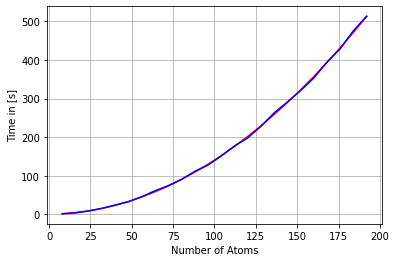

In [62]:
#curve fitting part
from scipy.optimize import curve_fit
datalist = [1.198791265487671, 3.967493772506714, 8.7883882522583, 15.605122566223145, 24.176962852478027, 32.87297296524048, 45.74373507499695, 60.98107290267944, 74.32088994979858, 90.4915418624878, 111.26894021034241, 127.44833827018738, 151.1162302494049, 176.9047110080719, 198.00833773612976, 227.88586950302124, 262.7821545600891, 291.1886696815491, 320.5733160972595, 353.153391122818, 394.6906108856201, 429.22401690483093, 475.9748775959015, 513.5912191867828]
dataarray = (np.arange(24) +1)*8

def expectedFunction(x,a,b,c):
    ''' quadratic function for fitting
    '''
    return a*x**2 + b*x +c

#fitting
param, _ = curve_fit(expectedFunction,dataarray,datalist)
a, b,c = param[0], param[1], param[2]

yQuad = expectedFunction(dataarray,a,b,c)
print(a,b,c)
#plotting
plt.plot(dataarray,yQuad,'r')
plt.plot(dataarray,datalist,'b')
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.show()
#shown that this is quadratic :)